<a href="https://colab.research.google.com/github/2303A52261/Generative-AI/blob/main/2303A52261_week9_ASS9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.(1 ponto) Design a multilayer ANN architecture to identify the hand-written digits using the Keras deep learning library. Consider the MNIST data set 2.(1 ponto) Calculate the accuracy with training and testing data 3.(1 ponto) Also, change the architecture by tuning no. of hidden layers, no. of hidden neurons and activation functions in hidden layer. Identify best architecture in terms of testing accuracy Tabela 1: ANN Architecture Layer Neurons Activation Function Hidden Layer - 1 32 relu Hidden Layer - 2 32 relu Hidden Layer - 3 32 relu Tabela 2: Training Parameters epochs batch size error metric Optimizer 10 128 accuracy adadelta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adadelta
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical # import to_categorical instead of np_utils
from sklearn.metrics import accuracy_score


In [2]:

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape the data to be in the shape (samples, features)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert labels to categorical format (one-hot encoding)
# Instead of np_utils.to_categorical, use to_categorical directly
# as it has been imported from tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical # make sure this import is present
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Create the model
model = Sequential()

# Flatten the input (28x28 pixels) to a 1D vector of 784 elements
model.add(Flatten(input_shape=(28, 28, 1)))

# Add the first hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Add the second hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Add the third hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with Adadelta optimizer and categorical crossentropy loss
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562 (107.66 KB)

 Trainable params: 27,562 (107.66 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model on the test set
train_accuracy = history.history['accuracy'][-1]
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1291 - loss: 2.3606 - val_accuracy: 0.1405 - val_loss: 2.3432
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1383 - loss: 2.3408 - val_accuracy: 0.1522 - val_loss: 2.3236
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1482 - loss: 2.3231 - val_accuracy: 0.1614 - val_loss: 2.3075
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1613 - loss: 2.3069 - val_accuracy: 0.1727 - val_loss: 2.2939
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1743 - loss: 2.2927 - val_accuracy: 0.1828 - val_loss: 2.2818
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1820 - loss: 2.2823 - val_accuracy: 0.1945 - val_loss: 2.2706
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1907 - loss: 2.2713 - val_accuracy: 0.2045 - val_loss: 2.2596
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2040 - loss: 2.2586 - val_accuracy: 0.

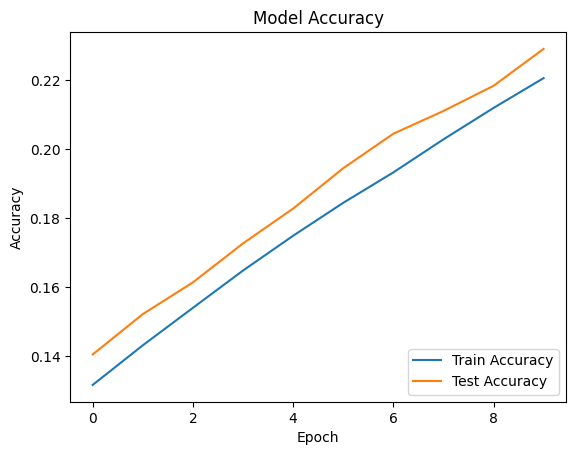

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [6]:
# Model with fewer neurons in the hidden layers
model_2 = Sequential()
model_2.add(Flatten(input_shape=(28, 28, 1)))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
train_accuracy_2 = history_2.history['accuracy'][-1]
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy (Reduced Neurons): {train_accuracy_2 * 100:.2f}%')
print(f'Testing Accuracy (Reduced Neurons): {test_accuracy_2 * 100:.2f}%')


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1024 - loss: 2.2916 - val_accuracy: 0.1004 - val_loss: 2.2888
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1109 - loss: 2.2862 - val_accuracy: 0.1122 - val_loss: 2.2828
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1222 - loss: 2.2803 - val_accuracy: 0.1241 - val_loss: 2.2764
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1354 - loss: 2.2738 - val_accuracy: 0.1408 - val_loss: 2.2698
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1511 - loss: 2.2667 - val_accuracy: 0.1553 - val_loss: 2.2629
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1671 - loss: 2.2610 - val_accuracy: 0.1720 - val_loss: 2.2558
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1803 - loss: 2.2545 - val_accuracy: 0.1883 - val_loss: 2.2486
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1951 - loss: 2.2468 - val_accuracy: 0.

In [7]:
# Model with more neurons in the hidden layers
model_3 = Sequential()
model_3.add(Flatten(input_shape=(28, 28, 1)))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
train_accuracy_3 = history_3.history['accuracy'][-1]
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy (Increased Neurons): {train_accuracy_3 * 100:.2f}%')
print(f'Testing Accuracy (Increased Neurons): {test_accuracy_3 * 100:.2f}%')


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0863 - loss: 2.2951 - val_accuracy: 0.0921 - val_loss: 2.2800
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1026 - loss: 2.2743 - val_accuracy: 0.1149 - val_loss: 2.2591
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1247 - loss: 2.2543 - val_accuracy: 0.1474 - val_loss: 2.2377
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1594 - loss: 2.2322 - val_accuracy: 0.1912 - val_loss: 2.2154
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2001 - loss: 2.2104 - val_accuracy: 0.2355 - val_loss: 2.1922
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2498 - loss: 2.1867 - val_accuracy: 0.2868 - val_loss: 2.1678
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3023 - loss: 2.1626 - val_accuracy: 0.3321 - val_loss: 2.1420
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3494 - loss: 2.1365 - val_accuracy: 0.

In [11]:
# Model with Sigmoid activation function in hidden layers
model_4 = Sequential()
model_4.add(Flatten(input_shape=(28, 28, 1)))
model_4.add(Dense(32, activation='sigmoid'))
model_4.add(Dense(32, activation='sigmoid'))
model_4.add(Dense(32, activation='sigmoid'))
model_4.add(Dense(10, activation='softmax'))

model_4.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_4 = model_4.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
train_accuracy_4 = history_4.history['accuracy'][-1]
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy (Sigmoid Activation): {train_accuracy_4 * 100:.2f}%')
print(f'Testing Accuracy (Sigmoid Activation): {test_accuracy_4 * 100:.2f}%')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0981 - loss: 2.3974 - val_accuracy: 0.1009 - val_loss: 2.3957
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0991 - loss: 2.3909 - val_accuracy: 0.1009 - val_loss: 2.3898
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1002 - loss: 2.3831 - val_accuracy: 0.1009 - val_loss: 2.3841
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0990 - loss: 2.3800 - val_accuracy: 0.1009 - val_loss: 2.3785
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0987 - loss: 2.3764 - val_accuracy: 0.1009 - val_loss: 2.3732
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0978 - loss: 2.3706 - val_accuracy: 0.1009 - val_loss: 2.3682
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0988 - loss: 2.3670 - val_accuracy: 0.1009 - val_loss: 2.3636
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0983 - loss: 2.3616 - val_accuracy: 0.

In [12]:
# Print the results for comparison
print(f'Original Architecture Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Reduced Neurons Test Accuracy: {test_accuracy_2 * 100:.2f}%')
print(f'Increased Neurons Test Accuracy: {test_accuracy_3 * 100:.2f}%')
print(f'Sigmoid Activation Test Accuracy: {test_accuracy_4 * 100:.2f}%')

Original Architecture Test Accuracy: 22.91%
Reduced Neurons Test Accuracy: 22.04%
Increased Neurons Test Accuracy: 45.76%
Sigmoid Activation Test Accuracy: 10.09%


In [13]:
# Save the best model (e.g., the one with the highest test accuracy)
model.save('best_mnist_model.h5')
print("Best model saved as 'best_mnist_model.h5'")

Best model saved as 'best_mnist_model.h5'
